In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from time import sleep
from datetime import date, timedelta, datetime, timezone
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
data_path = "../data/raw/NOMAD"
data_file = "nomad_seabass_v2.a_2008200.txt"
cols=["year","month","day","hour","minute","second","lat","lon","id","oisst","etopo2",
      "chl","chl_a","kd405","kd411","kd443","kd455","kd465","kd489","kd510","kd520",
      "kd530","kd550","kd555","kd560","kd565","kd570","kd590","kd619","kd625","kd665",
      "kd670","kd683","lw405","lw411","lw443","lw455","lw465","lw489","lw510","lw520",
      "lw530","lw550","lw555","lw560","lw565","lw570","lw590","lw619","lw625","lw665",
      "lw670","lw683","es405","es411","es443","es455","es465","es489","es510","es520",
      "es530","es550","es555","es560","es565","es570","es590","es619","es625","es665",
      "es670","es683","ap405","ap411","ap443","ap455","ap465","ap489","ap510","ap520",
      "ap530","ap550","ap555","ap560","ap565","ap570","ap590","ap619","ap625","ap665",
      "ap670","ap683","ad405","ad411","ad443","ad455","ad465","ad489","ad510","ad520",
      "ad530","ad550","ad555","ad560","ad565","ad570","ad590","ad619","ad625","ad665",
      "ad670","ad683","ag405","ag411","ag443","ag455","ag465","ag489","ag510","ag520",
      "ag530","ag550","ag555","ag560","ag565","ag570","ag590","ag619","ag625","ag665",
      "ag670","ag683","a405","a411","a443","a455","a465","a489","a510","a520","a530"
      ,"a550","a555","a560","a565","a570","a590","a619","a625","a665","a670","a683",
      "bb405","bb411","bb443","bb455","bb465","bb489","bb510","bb520","bb530","bb550",
      "bb555","bb560","bb565","bb570","bb590","bb619","bb625","bb665","bb670","bb683",
      "bbr420","bbr442","bbr470","bbr488","bbr510","bbr514","bbr532","bbr550","bbr555",
      "bbr589","bbr620","bbr671","bbr676","bbr870","wt","sal","poc","kpar","z_37","z_10",
      "z_01","chlide_a","mv_chl_a","dv_chl_a","chl_c3","chl_c2","chl_c1c2","perid",
      "but-fuco","hex-fuco","fuco","pras","viola","diadino","allo","diato","lut","zea",
      "chl_b","beta-car","alpha-car","alpha-beta-car","flag","cruise"]


description = \
"""
! alphabetical description of data products
! -----------------------------------------
! a	     ~ total absorption coefficient (m-1)
! ad     ~ detrital (non-algal) absorption coefficient (m-1)
! ag     ~ dissolved (gelbstoff) absorption coefficient (m-1)
! ap     ~ particulate absorption coefficient (m-1)
! bb     ~ total backscattering coefficient (fit) (m-1)
! bbr    ~ total backscattering coefficient (original) (m-1)
! chl    ~ fluorometric chlorophyll a (mg m-3)
! chl_a  ~ hplc chlorophyll a (mg m-3)
! cruise ~ field campaign on which data record was collected
! es     ~ spectral surface irradiance (uW cm-2 nm-1)
! etopo2 ~ NGDC ETOPO2 water depth (meters)
! flag   ~ NOMAD binary indicator flag (unitless)
! id     ~ NOMAD record identifier (unitless)
! kd     ~ diffuse downwelling irradiance coefficient (m-1)
! kpar   ~ diffuse downwelling coefficient for PAR (m-1)
! lw     ~ spectral water-leaving radiance (uW cm-2 nm-1 sr-1)
! oisst  ~ optimal interpolation (OI) sea surface temperature (SST) (degrees C)
! sal    ~ average salinity for 0-3 meters (PSU)
! wt     ~ average water temperature for 0-3 meters (degrees C)
! z_01   ~ depth of  1% light level of PAR (m)
! z_10   ~ depth of 10% light level of PAR (m)
! z_37   ~ depth of 37% light level of PAR (m)
!
! alphabetical description of HPLC data products (all units mg m-3)
! -----------------------------------------------------------------
! allo           ~ alloxanthin
! alpha_beta_car ~ alpha-carotene + beta-carotene
! alpha_car      ~ alpha- (beta,epsilon) carotene
! beta_car       ~ beta- (beta,beta) carotene
! but_fuco       ~ 19'-butanoyloxyfucoxanthin
! chl_a          ~ total chlorophyll a == dv_chl_a + mv_chl_a + chlide_a + allomers + epimers
! chl_b          ~ chlorophyll b
! chl_c1c2       ~ chlorophyll c1 + chlorophyll c2
! chl_c2         ~ chlorophyll c2
! chl_c3         ~ chlorophyll c3
! chlide_a       ~ chlorophyllide a
! diadino        ~ diadinoxanthin
! diato          ~ diatoxanthin
! dv_chl_a       ~ divinyl chlorophyll a
! fuco           ~ fucoxanthing
! hex_fuco       ~ 19'-hexanoyloxyfucoxanthin
! lut            ~ lutein
! mv_chl_a       ~ monovinyl chlorophyll a
! perid          ~ peridinin
! pras           ~ prasinoxanthin
! viola          ~ violaxanthin
! zea            ~ zeaxanthin
"""



In [63]:
df = pd.read_csv(os.path.join(data_path, data_file), header=None, skiprows=91)
df.columns = cols

In [64]:
# Filter out NaN
df = df[df["chl_a"]!=-999]
df.describe()

,year,month,day,hour,minute,second,lat,lon,id,oisst,...,diadino,allo,diato,lut,zea,chl_b,beta-car,alpha-car,alpha-beta-car,flag
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.0,1381.000000,1381.000000,1381.000000,1381.000000,...,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,2001.465605,6.205648,15.543809,14.817524,28.458364,0.0,11.752954,-53.511340,5175.859522,19.159754,...,-76.504404,-90.360847,-132.347144,-344.322052,-76.540446,-274.103125,-550.487492,-550.490576,-161.964471,4.011284e+05
std,2.959830,3.025208,8.719485,4.435040,17.197128,0.0,32.350239,60.334355,2161.341423,7.629313,...,266.084729,286.753724,338.843878,474.967831,266.074389,445.984012,497.082349,497.078932,368.433116,7.313506e+05
min,1995.000000,1.000000,1.000000,0.000000,0.000000,0.0,-64.418600,-177.004000,644.000000,-1.460000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,7.090000e+02
25%,2000.000000,4.000000,8.000000,13.000000,15.000000,0.0,-10.776700,-88.669400,2853.000000,15.090000,...,0.009400,0.000000,0.000000,-999.000000,0.013060,-999.000000,-999.000000,-999.000000,0.000000,1.658100e+04
50%,2001.000000,5.000000,16.000000,15.000000,28.000000,0.0,29.842400,-63.852000,6181.000000,20.080000,...,0.040400,0.002940,0.003700,0.001000,0.035200,0.007000,-999.000000,-999.000000,0.007200,1.863100e+04
75%,2003.000000,9.000000,23.000000,18.000000,43.000000,0.0,34.298000,-21.500800,6796.000000,25.450000,...,0.129200,0.029600,0.022000,0.007000,0.082100,0.058700,0.000900,0.001300,0.028000,2.293830e+05
max,2007.000000,12.000000,31.000000,23.000000,59.000000,0.0,54.000300,173.920000,7765.000000,30.760000,...,5.013000,2.887700,4.074000,0.450500,6.597200,2.131600,1.037100,1.428100,4.584000,3.296511e+06


In [65]:
# Create date column
df["datetime"] = df.progress_apply(lambda x: datetime.strptime(str("{:02d}/{:02d}/{:04d} {:02d}:{:02d}:{:02d}")\
                      .format(x["day"], x["month"], x["year"], x["hour"], \
                             x["minute"], x["second"]), '%d/%m/%Y %H:%M:%S'), axis=1)

  0%|          | 0/1381 [00:00<?, ?it/s]

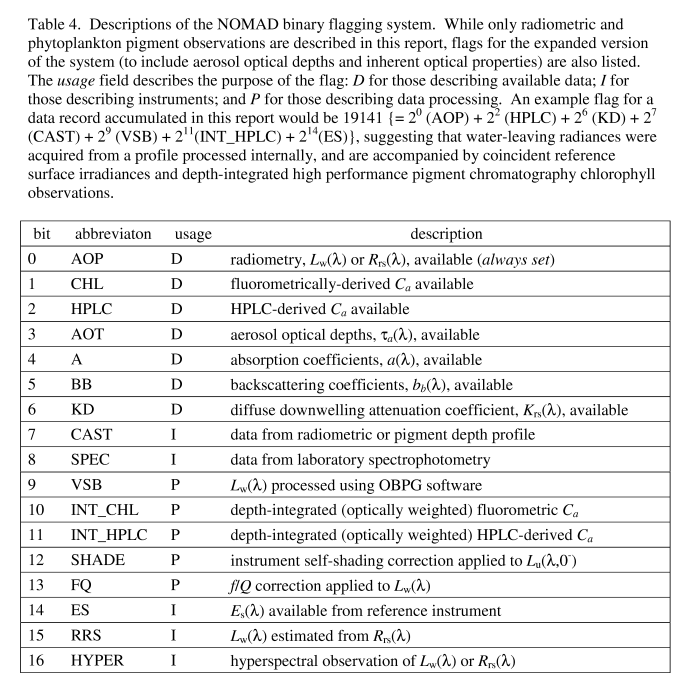

In [66]:
df["flag"] = df["flag"].apply(lambda x: "{0:b}".format(x))
# flags only describe which data is available, no QA flags included

In [67]:
# create df with: datetime, lat, lon, chl_a, rs_data
nomad_cols = ["datetime", "lat", "lon", "chl_a"]
df = df[nomad_cols]
df

,datetime,lat,lon,chl_a
16,2000-02-22 13:30:00,-61.5990,-62.598,0.283
17,2000-02-22 17:00:00,-61.4500,-62.299,0.118
18,2000-02-24 13:35:00,-61.3000,-59.590,0.389
22,2000-02-28 18:30:00,-60.4500,-56.299,0.289
23,2000-02-29 12:20:00,-61.1500,-55.600,3.216
...,...,...,...,...
4314,2006-03-18 23:51:00,35.9992,-151.999,0.160
4315,2006-03-20 22:45:00,40.0000,-152.000,0.241
4316,2006-03-23 23:50:00,45.0011,-152.000,0.353
4317,2006-03-24 22:08:00,47.0000,-152.001,0.476


In [68]:
df["date"]=df["datetime"].apply(lambda x: x.date())
df["date_start"] = df["date"].apply(lambda x: str(x - timedelta(days=30)))
df["date_end"] = df["date"].apply(lambda x: str(x + timedelta(days=30)))
df

,datetime,lat,lon,chl_a,date,date_start,date_end
16,2000-02-22 13:30:00,-61.5990,-62.598,0.283,2000-02-22,2000-01-23,2000-03-23
17,2000-02-22 17:00:00,-61.4500,-62.299,0.118,2000-02-22,2000-01-23,2000-03-23
18,2000-02-24 13:35:00,-61.3000,-59.590,0.389,2000-02-24,2000-01-25,2000-03-25
22,2000-02-28 18:30:00,-60.4500,-56.299,0.289,2000-02-28,2000-01-29,2000-03-29
23,2000-02-29 12:20:00,-61.1500,-55.600,3.216,2000-02-29,2000-01-30,2000-03-30
...,...,...,...,...,...,...,...
4314,2006-03-18 23:51:00,35.9992,-151.999,0.160,2006-03-18,2006-02-16,2006-04-17
4315,2006-03-20 22:45:00,40.0000,-152.000,0.241,2006-03-20,2006-02-18,2006-04-19
4316,2006-03-23 23:50:00,45.0011,-152.000,0.353,2006-03-23,2006-02-21,2006-04-22
4317,2006-03-24 22:08:00,47.0000,-152.001,0.476,2006-03-24,2006-02-22,2006-04-23


In [69]:
locations = df.groupby(["lat", "lon"]).mean()
locations = locations.reset_index()[["lat", "lon"]]
locations

,lat,lon
0,-64.4186,83.5511
1,-63.7834,-60.2150
2,-63.2524,-60.0088
3,-63.0100,-58.0100
4,-63.0004,-58.4989
...,...,...
1310,49.0311,-8.8723
1311,49.6748,-5.6903
1312,49.8388,-4.1484
1313,50.0026,-3.4676


In [70]:
import folium
f_map = folium.Map(location=[0, 0], zoom_start=2, min_lat=-90, max_lat=90, \
                   min_lon=-180, max_lon=180, max_bounds=True)\
                   


for point in df[["lat", "lon"]].values:
    folium.CircleMarker(list(point), fill_color="red", radius=2, weight=0).add_to(f_map)
f_map.fit_bounds([[-90, -180], [90, 180]])
display(f_map)

## Download MODIS pixel values

Quality mask Landsat-7 QA_PIXEL
    Bit 0: Fill
    Bit 1: Dilated Cloud
    Bit 2: Unused
    Bit 3: Cloud
    Bit 4: Cloud Shadow
    Bit 5: Snow
    Bit 6: Clear
        0: Cloud or Dilated Cloud bits are set
        1: Cloud and Dilated Cloud bits are not set
    Bit 7: Water
    Bits 8-9: Cloud Confidence
        0: None
        1: Low
        2: Medium
        3: High
    Bits 10-11: Cloud Shadow Confidence
        0: None
        1: Low
        2: Medium
        3: High
    Bits 12-13: Snow/Ice Confidence
        0: None
        1: Low
        2: Medium
        3: High
    Bits 14-15: Cirrus Confidence
        0: None
        1: Low
        2: Medium
        3: High

In [11]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWhtY11tng71sJPTjcE0O4ozSeUBxgSMFFCsfKeuDs0tFwYhcWJ0mLQ

Successfully saved authorization token.


In [12]:
aoi = ee.Geometry.Point(lat=-64.4186, lon=83.5511)
img = ee.Image(ee.ImageCollection("LANDSAT/LE07/C01/T2_SR")\
                        .filterBounds(aoi)
                        .filterDate(ee.Date("2000-01-01"), ee.Date("2020-01-01"))
                        .first()
                      )

In [13]:
collection = ee.ImageCollection("NASA/OCEANDATA/MODIS-Aqua/L3SMI")\
                        .filterBounds(aoi)\
                        .filterDate(ee.Date("2000-01-01"), ee.Date("2006-01-01"))\

collection.size().getInfo()

1271

In [14]:
output = img.getInfo()
display(output)

None

In [15]:
metadata_cols = ["DATA_SOURCE_AIR_TEMPERATURE", \
                "DATA_SOURCE_ELEVATION",
                "DATA_SOURCE_OZONE",
                "DATA_SOURCE_PRESSURE",
                "DATA_SOURCE_WATER_VAPOR",
                "EARTH_SUN_DISTANCE",
                "SCENE_CENTER_TIME",
                "SUN_AZIMUTH",
                "SUN_ELEVATION",
                "TEMPERATURE_MAXIMUM_BAND_ST_B6",
                "TEMPERATURE_MINIMUM_BAND_ST_B6"]

In [16]:
from enum import Flag, IntFlag, auto

Bit 0: Fill
Bit 1: Dilated Cloud
Bit 2: Unused
Bit 3: Cloud
Bit 4: Cloud Shadow
Bit 5: Snow
Bit 6: Clear
    0: Cloud or Dilated Cloud bits are set
    1: Cloud and Dilated Cloud bits are not set
Bit 7: Water
Bits 8-9: Cloud Confidence
    0: None
    1: Low
    2: Medium
    3: High
Bits 10-11: Cloud Shadow Confidence
    0: None
    1: Low
    2: Medium
    3: High
Bits 12-13: Snow/Ice Confidence
    0: None
    1: Low
    2: Medium
    3: High
Bits 14-15: Cirrus Confidence
    0: None
    1: Low
    2: Medium
    3: High

In [17]:
type(df["date_start"].iloc[0])

str

In [18]:
df = df[df["date_start"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d")) > datetime.strptime("2002-07-04", "%Y-%m-%d")]

In [19]:
band_cols = ["SR_B1", "SR_B2", "SR_B3", "SR_B4", "SR_B5", "ST_B6", "SR_B7"]
quality_col = "QA_PIXEL"

class QA_flag(IntFlag):
    dilated_cloud = 2**1
    cloud = 2**3
    cloud_shadow = 2**4
    snow = 2**5
    
def qa_flag_mask(x):
    return (QA_flag.dilated_cloud or QA_flag.cloud or QA_flag.cloud_shadow or QA_flag.snow) in QA_flag(x)

def create_reflectance_df(nomad_df, output_path, collection_name="NASA/OCEANDATA/MODIS-Aqua/L3SMI"):

    n_missing = 0
    for index, row in tqdm(nomad_df.iterrows(), total=len(nomad_df)):
        aoi = ee.Geometry.Point(lon=row["lon"], lat=row["lat"])
        aoi = ee.Geometry.Point(0,0)
        # Get all values within one month before or after
        collection = ee.ImageCollection(collection_name)\
                        .filterBounds(aoi)\
                        .filterDate(ee.Date(row["date_start"]), ee.Date(row["date_end"]))
                
        count = collection.size()
                       
        if count.getInfo()>0:
          
            # Retrieve properties as time series (list)
#             zenith_angle = collection.aggregate_array("SUN_ELEVATION").getInfo()
#             azimuth_angle = collection.aggregate_array("SUN_AZIMUTH").getInfo()
                       
            # Retrieve pixel values for region as time series (list of lists)
            
            values = collection.getRegion(geometry=aoi, scale=10)
            values = values.getInfo()
                        
            # Create dataframe
            values = pd.DataFrame(values)
            
            
            # First row is header
            values.columns = values.iloc[0]
            values = values[1:]
            
            values["index"] = index
            
            # Create columns for properties time series
#             values["zenith_angle"] = np.repeat([90], repeats=len(zenith_angle)) - np.array(zenith_angle)
#             values["azimuth_angle"] = azimuth_angle
            values["retrieval_datetime"] = pd.to_datetime(values["time"], unit='ms')
            values["in_situ_datetime"] = row["datetime"]
            
            # Filter by pixel quality
#             mask = values["QA_PIXEL"].apply(qa_flag_mask)
#             values = values[~mask]
                        
            # Select closest
            values["datetime_difference"] = (values["retrieval_datetime"] - values["in_situ_datetime"]).abs()
            values = values.sort_values(by=["datetime_difference"], ascending=True)
            
            # Append output to csv
            values = values.dropna()
        
            if len(values)>0:
                pd.DataFrame(values.iloc[0]).T.to_csv(output_path, mode="a", header=not os.path.exists(output_path))
            
        else:
            print("Missing data for row {}".format(index))
            n_missing +=1

        sleep(0.1)
        
    print(n_missing)
    return

In [20]:
# create_reflectance_df(df, "output.csv")

In [76]:
df

,datetime,lat,lon,chl_a,date,date_start,date_end
16,2000-02-22 13:30:00,-61.5990,-62.598,0.283,2000-02-22,2000-01-23,2000-03-23
17,2000-02-22 17:00:00,-61.4500,-62.299,0.118,2000-02-22,2000-01-23,2000-03-23
18,2000-02-24 13:35:00,-61.3000,-59.590,0.389,2000-02-24,2000-01-25,2000-03-25
22,2000-02-28 18:30:00,-60.4500,-56.299,0.289,2000-02-28,2000-01-29,2000-03-29
23,2000-02-29 12:20:00,-61.1500,-55.600,3.216,2000-02-29,2000-01-30,2000-03-30
...,...,...,...,...,...,...,...
4314,2006-03-18 23:51:00,35.9992,-151.999,0.160,2006-03-18,2006-02-16,2006-04-17
4315,2006-03-20 22:45:00,40.0000,-152.000,0.241,2006-03-20,2006-02-18,2006-04-19
4316,2006-03-23 23:50:00,45.0011,-152.000,0.353,2006-03-23,2006-02-21,2006-04-22
4317,2006-03-24 22:08:00,47.0000,-152.001,0.476,2006-03-24,2006-02-22,2006-04-23


In [83]:
df_out = pd.read_csv("output.csv")
df_out = df_out.set_index(df_out.columns[0]).join(df, on="index")
df_out.to_csv("../data/processed/NOMAD/in_situ.csv")

In [84]:
df_out.columns

Index(['id', 'longitude', 'latitude', 'time', 'chlor_a', 'nflh', 'poc',
       'Rrs_412', 'Rrs_443', 'Rrs_469', 'Rrs_488', 'Rrs_531', 'Rrs_547',
       'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'sst', 'index',
       'retrieval_datetime', 'in_situ_datetime', 'datetime_difference',
       'datetime', 'lat', 'lon', 'chl_a', 'date', 'date_start', 'date_end'],
      dtype='object')

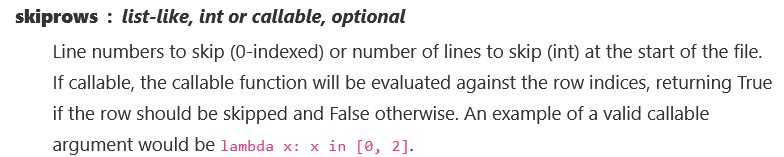

In [51]:
rng = np.random.default_rng()
idx = rng.integers(low=0, high=100, size=10, dtype=np.int64)

In [52]:
rows_to_skip = lambda x: x not in idx

In [59]:
cols = pd.read_csv("output.csv", header=0, nrows=1).columns
test_df = pd.read_csv("output.csv", header=None, skiprows=rows_to_skip, names=cols)

# Simulation data preprocessing

In [2]:
import xarray as xr

In [3]:
filepath = "../data/raw/NOMAD/LUT_for_WDC_I_ds_1.nc"

In [4]:
ds = xr.open_dataset(filepath)

In [5]:
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:     (adg: 10, apig: 10, aratio: 3, aza: 25, bratio: 3, btot: 10, sal: 2, sza: 9, vza: 9, wvl: 630)
Coordinates:
  * sal         (sal) float64 0.0 35.0
  * sza         (sza) float64 0.0 12.55 22.98 33.32 ... 53.95 64.25 74.55 84.85
  * apig        (apig) float64 0.0005 0.001664 0.005536 ... 2.258 7.513 25.0
  * aratio      (aratio) float64 0.0 0.5 1.0
  * aza         (aza) float64 0.0 7.5 15.0 22.5 30.0 ... 157.5 165.0 172.5 180.0
  * vza         (vza) float64 0.0 12.55 22.98 33.32 ... 53.95 64.25 74.55 84.85
  * bratio      (bratio) float64 0.0 0.825 1.0
  * btot        (btot) float64 0.0 6.393e-05 0.0005366 ... 12.07 89.27 660.0
  * adg         (adg) float64 0.0 4.61e-05 0.0003047 ... 1.748 9.805 55.0
Dimensions without coordinates: wvl
Data variables:
    wavelength  (wvl) float64 ...
    data        (wvl, sza, vza, aza, sal, apig, adg, aratio, btot, bratio) float64 ...
Attribut

In [6]:
ds.coords

Coordinates:
  * sal      (sal) float64 0.0 35.0
  * sza      (sza) float64 0.0 12.55 22.98 33.32 43.64 53.95 64.25 74.55 84.85
  * apig     (apig) float64 0.0005 0.001664 0.005536 ... 2.258 7.513 25.0
  * aratio   (aratio) float64 0.0 0.5 1.0
  * aza      (aza) float64 0.0 7.5 15.0 22.5 30.0 ... 157.5 165.0 172.5 180.0
  * vza      (vza) float64 0.0 12.55 22.98 33.32 43.64 53.95 64.25 74.55 84.85
  * bratio   (bratio) float64 0.0 0.825 1.0
  * btot     (btot) float64 0.0 6.393e-05 0.0005366 ... 12.07 89.27 660.0
  * adg      (adg) float64 0.0 4.61e-05 0.0003047 0.001755 ... 1.748 9.805 55.0

In [7]:
ds.dims

Frozen(SortedKeysDict({'sal': 2, 'sza': 9, 'apig': 10, 'wvl': 630, 'aratio': 3, 'aza': 25, 'vza': 9, 'bratio': 3, 'btot': 10, 'adg': 10}))

In [8]:
ds.attrs

{'Conventions': 'CF-1.6',
 'lutshape': '(630, 9, 9, 25, 2, 10, 10, 3, 10, 3)',
 'title': 'LUT including MOMO simulated remote sensing reflectances in dependency of IOPs for 390 to 1020 nmLUT including MOMO simulated remote sensing reflectances in dependency of IOPs for 390 to 1020 nmLUT including MOMO simulated remote sensing reflectances in dependency of IOPs for 390 to 1020 nm',
 'institution': 'Institut of Space Sciences, FU Berlin',
 'source': 'MOMO45',
 'references': 'Fell and Fischer (2001),Hollstein and Fischer (2012)',
 'history': 'Tue Jun 13 11:26:34 2017: ncatted -O -a history,global,d,c, LUT_for_WDC_I.nc'}

In [9]:
wavelengths = np.array([412, 443, 469, 488, 531, 547, 555, 645, 667, 678])

In [10]:
wavelength_cols = ['Rrs_412', 'Rrs_443', 'Rrs_469', 'Rrs_488', 'Rrs_531', 'Rrs_547',
       'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678']

In [14]:
temp_df = ds.loc[dict(wvl=412-360, sza=0, vza=0)].to_dataframe()

In [16]:
temp_df.reset_index()

,adg,apig,aratio,aza,bratio,btot,sal,sza,wavelength,vza,data
0,0.0,0.0005,0.0,0.0,0.0,0.000000,0.0,0.0,442.0,0.0,0.016052
1,0.0,0.0005,0.0,0.0,0.0,0.000000,35.0,0.0,442.0,0.0,0.015869
2,0.0,0.0005,0.0,0.0,0.0,0.000064,0.0,0.0,442.0,0.0,0.016098
3,0.0,0.0005,0.0,0.0,0.0,0.000064,35.0,0.0,442.0,0.0,0.015915
4,0.0,0.0005,0.0,0.0,0.0,0.000537,0.0,0.0,442.0,0.0,0.016418
...,...,...,...,...,...,...,...,...,...,...,...
449995,55.0,25.0000,1.0,180.0,1.0,12.074444,35.0,0.0,442.0,0.0,0.000016
449996,55.0,25.0000,1.0,180.0,1.0,89.270029,0.0,0.0,442.0,0.0,0.000099
449997,55.0,25.0000,1.0,180.0,1.0,89.270029,35.0,0.0,442.0,0.0,0.000098
449998,55.0,25.0000,1.0,180.0,1.0,660.000000,0.0,0.0,442.0,0.0,0.000744


In [37]:
temp_df2 = ds.loc[dict(wvl=443-360)]["data"].data
temp_df2 = temp_df2.flatten()

In [38]:
temp_df2

array([0.00932312, 0.00932312, 0.00932312, ..., 0.0375061 , 0.0104599 ,
       0.00080347])

In [40]:
from sys import getsizeof
getsizeof(temp_df2)

291600104

In [39]:
len(temp_df2)

36450000

In [ ]:
temp_df2.reset_index()

In [43]:
temp_df = ds["data"][wavelengths[0]-390, 0, :, :, :, :, :, :, :, :]
temp_df = temp_df.to_dataframe()
temp_df = temp_df.reset_index()
# temp_df.to_dataframe()

In [47]:
temp_df

,vza,aza,sal,apig,adg,aratio,btot,bratio,sza,data
0,0.000000,0.0,0.0,0.0005,0.0,0.0,0.000000,0.000,0.0,0.024719
1,0.000000,0.0,0.0,0.0005,0.0,0.0,0.000000,0.825,0.0,0.024719
2,0.000000,0.0,0.0,0.0005,0.0,0.0,0.000000,1.000,0.0,0.024719
3,0.000000,0.0,0.0,0.0005,0.0,0.0,0.000064,0.000,0.0,0.024780
4,0.000000,0.0,0.0,0.0005,0.0,0.0,0.000064,0.825,0.0,0.024734
...,...,...,...,...,...,...,...,...,...,...
4049995,84.850827,180.0,35.0,25.0000,55.0,1.0,89.270029,0.825,0.0,0.000981
4049996,84.850827,180.0,35.0,25.0000,55.0,1.0,89.270029,1.000,0.0,0.000048
4049997,84.850827,180.0,35.0,25.0000,55.0,1.0,660.000000,0.000,0.0,0.030869
4049998,84.850827,180.0,35.0,25.0000,55.0,1.0,660.000000,0.825,0.0,0.007393


In [303]:
np.append(np.array(temp_df.iloc[0]),(temp_df.data))

array([0.00000000e+00, 0.00000000e+00, 5.00000000e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.47192383e-02, 2.47192383e-02, 1.56402588e-02,
       9.97161865e-03, 6.86264038e-03, 1.70516968e-03, 1.28269196e-03,
       1.08528137e-03, 1.13666058e-04, 7.30752945e-05, 6.56247139e-05])

In [7]:
# 630, 9, 9, 25, 2, 10, 10, 3, 10, 3
# wvl, sza, vza, aza, sal, apig, adg, aratio, btot, bratio
ds = ds["data"][wavelengths-390, :, :, 16:, :, :, :, :, :, :].to_dataframe()

In [8]:
ds.to_csv("MOMO_LUT_3.csv")

In [14]:
len(ds)

116640000

In [4]:
path = "../data/processed/NOMAD"

In [5]:
filenames = ["MOMO_LUT_1.csv", "MOMO_LUT_2.csv", "MOMO_LUT_3.csv"]

In [11]:
chunksize = 10 ** 6
n_rows = 0
rows_per_file = []
for filename in tqdm(filenames):
    n_rows_current_file = 0
    with pd.read_csv(os.path.join(path, filename), chunksize=chunksize) as reader:
        for chunk in reader:
            n_rows += len(chunk)
            n_rows_current_file += len(chunk)
    rows_per_file.append(n_rows_current_file)
            
print(n_rows)
print(rows_per_file)

  0%|          | 0/3 [00:00<?, ?it/s]

364500000
[116640000, 116640000, 131220000]


In [12]:
n_rows / 100000

3645.0

In [88]:
file_lengths = [116640000, 116640000, 131220000]
total_length = 364500000

In [99]:
rng = np.random.default_rng()
idx = np.array(sorted(rng.integers(low=0, high=364500000, size=100000, dtype=np.int64)))

idx[idx < file_lengths[0]]

array([     3063,      4909,     12183, ..., 116628986, 116633069,
       116633534], dtype=int64)

In [107]:
def sample_rows(path, files, file_lengths):
    rng = np.random.default_rng()
    indices = np.array(sorted(rng.integers(low=0, high=364500000, size=100000, dtype=np.int64)))
    idx = [indices[indices < file_length] for file_length in file_lengths]
    idx[1] = idx[1] - file_lengths[1]
    idx[2] = idx[2] - (file_lengths[1] + file_lengths[2])
    df = []
    
    cols = pd.read_csv(os.path.join(path, files[0]), nrows=1).columns
    
    for n_file, filename in tqdm(enumerate(files), total=len(files)):
        rows_to_skip = lambda x: x not in idx[n_file]
        sub_df = pd.read_csv(os.path.join(path, filename), header=None, skiprows=rows_to_skip)
        df.append(sub_df)
        del sub_df
        
    df = pd.DataFrame(df, columns=cols)
    return df


In [201]:
pd.read_csv(os.path.join(path, filenames[0]), nrows=10)

,wvl,sza,vza,aza,sal,apig,adg,aratio,btot,bratio,data
0,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000000,0.000,0.024719
1,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000000,0.825,0.024719
2,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000000,1.000,0.024719
3,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000064,0.000,0.024780
4,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000064,0.825,0.024734
5,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000064,1.000,0.024719
6,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000537,0.000,0.025223
7,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000537,0.825,0.024811
8,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.000537,1.000,0.024734
9,0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.004031,0.000,0.028534


In [245]:
indices = np.array(sorted(rng.integers(low=0, high=364500000, size=100000, dtype=np.int64)))

idx = [
    indices[indices<file_lengths[0]],
    indices[(indices>=file_lengths[0]) & (indices<file_lengths[0]+file_lengths[1])],
    indices[(indices>=file_lengths[0]+file_lengths[1]) & (indices<file_lengths[0]+file_lengths[1]+file_lengths[2])],
]

In [246]:
file_lengths

[116640000, 116640000, 131220000]

In [247]:
len(indices)

100000

In [248]:
np.sum([len(n) for n in idx])

100000

In [257]:
def sample_rows(path, files, file_lengths):
    rng = np.random.default_rng()
    indices = np.array(sorted(rng.integers(low=0, high=364500000, size=100000, dtype=np.int64)))
    
    idx = [
        indices[indices<file_lengths[0]],
        indices[(indices>=file_lengths[0]) & (indices<file_lengths[0]+file_lengths[1])],
        indices[(indices>=file_lengths[0]+file_lengths[1]) & (indices<file_lengths[0]+file_lengths[1]+file_lengths[2])],
    ]
    
    idx[1] = idx[1] - file_lengths[1]
    idx[2] = idx[2] - (file_lengths[1] + file_lengths[2])
    
    df = []
    
    cols = pd.read_csv(os.path.join(path, files[0]), nrows=1).columns
    chunksize=100000
    
    for n_file, filename in tqdm(enumerate(files), total=len(files)):
        rows_to_skip = lambda x: x not in idx[n_file]
        reader = pd.read_csv(os.path.join(path, filename), header=None, chunksize=chunksize)
        
        for i, chunk in tqdm(enumerate(reader), total=file_lengths[n_file]/chunksize):
            current_idx = idx[n_file][(idx[n_file] >= (i*chunksize)) & (idx[n_file] <= ((i+1)*chunksize))]
            
            try:
                chunk = chunk.loc[current_idx]
            except Exception as e:
                print(e)
                print(current_idx)
                print(i)
                print(i*chunksize)
                print((i+1)*chunksize)
                print(chunk)
            
            df.append(chunk)
        
    df = pd.concat(df)
    return df

In [258]:
lut_df = sample_rows(path, filenames, file_lengths)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1166.4 [00:00<?, ?it/s]

<ipython-input-258-e3b964060363>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  lut_df = sample_rows(path, filenames, file_lengths)


  0%|          | 0/1166.4 [00:00<?, ?it/s]

  0%|          | 0/1312.2 [00:00<?, ?it/s]

In [259]:
lut_df

,0,1,2,3,4,5,6,7,8,9,10
3987,0,0.0,0.0,0.0,0.0,0.06129162240265956,0.00989186009864223,0.0,89.27002937486527,1.0,0.1253662109375
5714,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.0017551742746432777,0.5,0.029868092203965312,0.825,0.0014066696166992188
5881,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.055535129351546544,0.5,0.0,0.0,0.0008182525634765625
9117,0,0.0,0.0,0.0,35.0,0.0005000000000000004,4.6095651522245854e-05,0.0,89.27002937486527,1.0,0.2305908203125
10632,0,0.0,0.0,0.0,35.0,0.0016637105959946231,9.804673341308312,0.0,0.004031240041032489,1.0,1.2636184692382812e-05
...,...,...,...,...,...,...,...,...,...,...,...
116608613,8,74.552062,84.850827,172.5,0.0,0.203943,0.000046,0.0,12.074444,0.825,0.009926
116609794,8,74.552062,84.850827,172.5,0.0,0.678604,0.009892,0.5,0.000064,0.0,0.000035
116615131,8,74.552062,84.850827,172.5,35.0,0.005536,0.001755,1.0,0.0,0.0,0.000041
116618675,8,74.552062,84.850827,172.5,35.0,0.678604,0.001755,0.0,0.000064,0.825,0.000034


In [260]:
lut_df.to_csv("MOMO_random_sample_lut.csv")

In [261]:
lut_df

,0,1,2,3,4,5,6,7,8,9,10
3987,0,0.0,0.0,0.0,0.0,0.06129162240265956,0.00989186009864223,0.0,89.27002937486527,1.0,0.1253662109375
5714,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.0017551742746432777,0.5,0.029868092203965312,0.825,0.0014066696166992188
5881,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.055535129351546544,0.5,0.0,0.0,0.0008182525634765625
9117,0,0.0,0.0,0.0,35.0,0.0005000000000000004,4.6095651522245854e-05,0.0,89.27002937486527,1.0,0.2305908203125
10632,0,0.0,0.0,0.0,35.0,0.0016637105959946231,9.804673341308312,0.0,0.004031240041032489,1.0,1.2636184692382812e-05
...,...,...,...,...,...,...,...,...,...,...,...
116608613,8,74.552062,84.850827,172.5,0.0,0.203943,0.000046,0.0,12.074444,0.825,0.009926
116609794,8,74.552062,84.850827,172.5,0.0,0.678604,0.009892,0.5,0.000064,0.0,0.000035
116615131,8,74.552062,84.850827,172.5,35.0,0.005536,0.001755,1.0,0.0,0.0,0.000041
116618675,8,74.552062,84.850827,172.5,35.0,0.678604,0.001755,0.0,0.000064,0.825,0.000034


In [262]:
cols = pd.read_csv(os.path.join(path, filenames[0]), nrows=1).columns

In [263]:
cols

Index(['wvl', 'sza', 'vza', 'aza', 'sal', 'apig', 'adg', 'aratio', 'btot',
       'bratio', 'data'],
      dtype='object')

In [264]:
lut_df.columns = cols
lut_df

,wvl,sza,vza,aza,sal,apig,adg,aratio,btot,bratio,data
3987,0,0.0,0.0,0.0,0.0,0.06129162240265956,0.00989186009864223,0.0,89.27002937486527,1.0,0.1253662109375
5714,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.0017551742746432777,0.5,0.029868092203965312,0.825,0.0014066696166992188
5881,0,0.0,0.0,0.0,0.0,0.6786044041487271,0.055535129351546544,0.5,0.0,0.0,0.0008182525634765625
9117,0,0.0,0.0,0.0,35.0,0.0005000000000000004,4.6095651522245854e-05,0.0,89.27002937486527,1.0,0.2305908203125
10632,0,0.0,0.0,0.0,35.0,0.0016637105959946231,9.804673341308312,0.0,0.004031240041032489,1.0,1.2636184692382812e-05
...,...,...,...,...,...,...,...,...,...,...,...
116608613,8,74.552062,84.850827,172.5,0.0,0.203943,0.000046,0.0,12.074444,0.825,0.009926
116609794,8,74.552062,84.850827,172.5,0.0,0.678604,0.009892,0.5,0.000064,0.0,0.000035
116615131,8,74.552062,84.850827,172.5,35.0,0.005536,0.001755,1.0,0.0,0.0,0.000041
116618675,8,74.552062,84.850827,172.5,35.0,0.678604,0.001755,0.0,0.000064,0.825,0.000034


In [266]:
lut_df.wvl.value_counts()

6    10142
1    10027
4    10015
2     9998
5     9981
3     9971
0     9947
7     9908
8     9441
9     6456
0       62
Name: wvl, dtype: int64

In [277]:
df = pd.read_csv(os.path.join(path, filenames[0]), nrows=1000000)

In [278]:
df

,wvl,sza,vza,aza,sal,apig,adg,aratio,btot,bratio,data
0,0,0.0,0.000000,0.0,0.0,0.000500,0.000000,0.0,0.000000,0.000,0.024719
1,0,0.0,0.000000,0.0,0.0,0.000500,0.000000,0.0,0.000000,0.825,0.024719
2,0,0.0,0.000000,0.0,0.0,0.000500,0.000000,0.0,0.000000,1.000,0.024719
3,0,0.0,0.000000,0.0,0.0,0.000500,0.000000,0.0,0.000064,0.000,0.024780
4,0,0.0,0.000000,0.0,0.0,0.000500,0.000000,0.0,0.000064,0.825,0.024734
...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.0,64.251922,52.5,35.0,0.001664,0.000046,0.0,0.000064,1.000,0.017929
999996,0,0.0,64.251922,52.5,35.0,0.001664,0.000046,0.0,0.000537,0.000,0.018356
999997,0,0.0,64.251922,52.5,35.0,0.001664,0.000046,0.0,0.000537,0.825,0.018005
999998,0,0.0,64.251922,52.5,35.0,0.001664,0.000046,0.0,0.000537,1.000,0.017929
